# Prac 03. Part 1

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

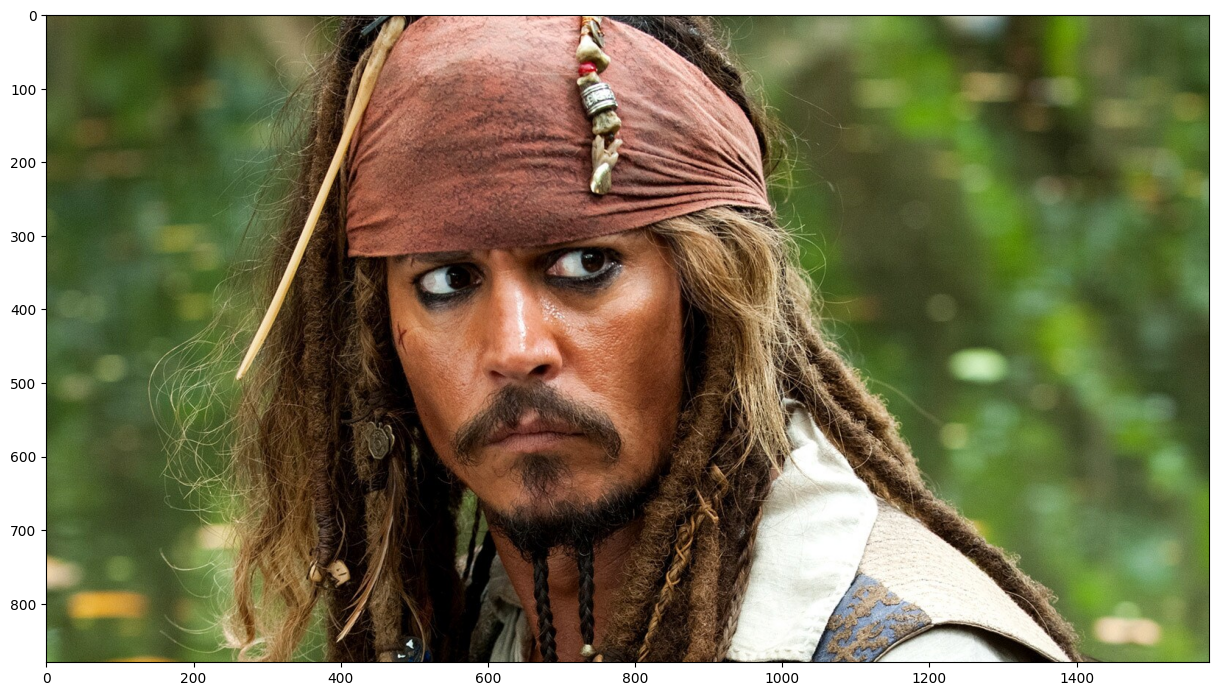

In [10]:
img = cv2.imread('data/image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

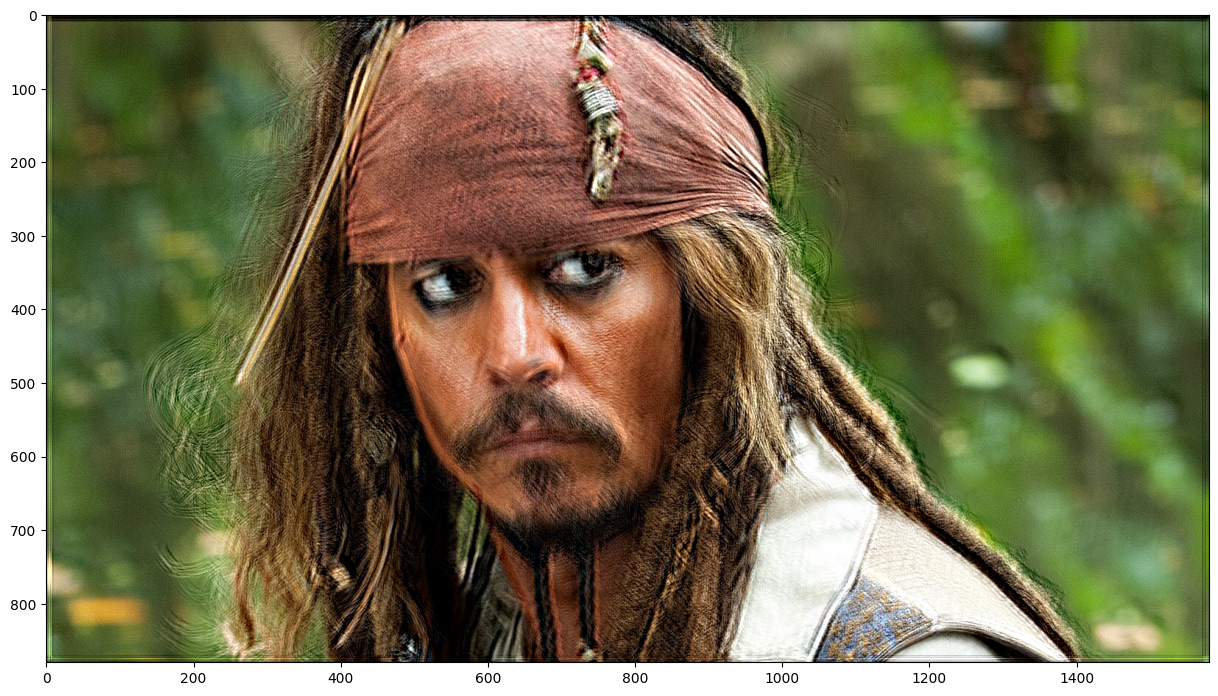

In [11]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
kernel = np.random.normal(size=(20, 20))
kernel /= np.sum(kernel)

def convolve(image):
    i_h, i_w = image.shape
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)
    for y in range(i_h):
        for x in range(i_w):
            region = padded[y:y+k_h, x:x+k_w]
            output[y, x] = np.sum(region * kernel)
    return output

channels = []
for c in range(3):
    convolved = convolve(img[:, :, c])
    channels.append(convolved)
img_usp = np.stack(channels, axis=2)
img_usp = np.clip(img_usp, 0, 255).astype(np.uint8)
plt.imshow(img_usp)

In [7]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - img_usp.astype(np.float32)

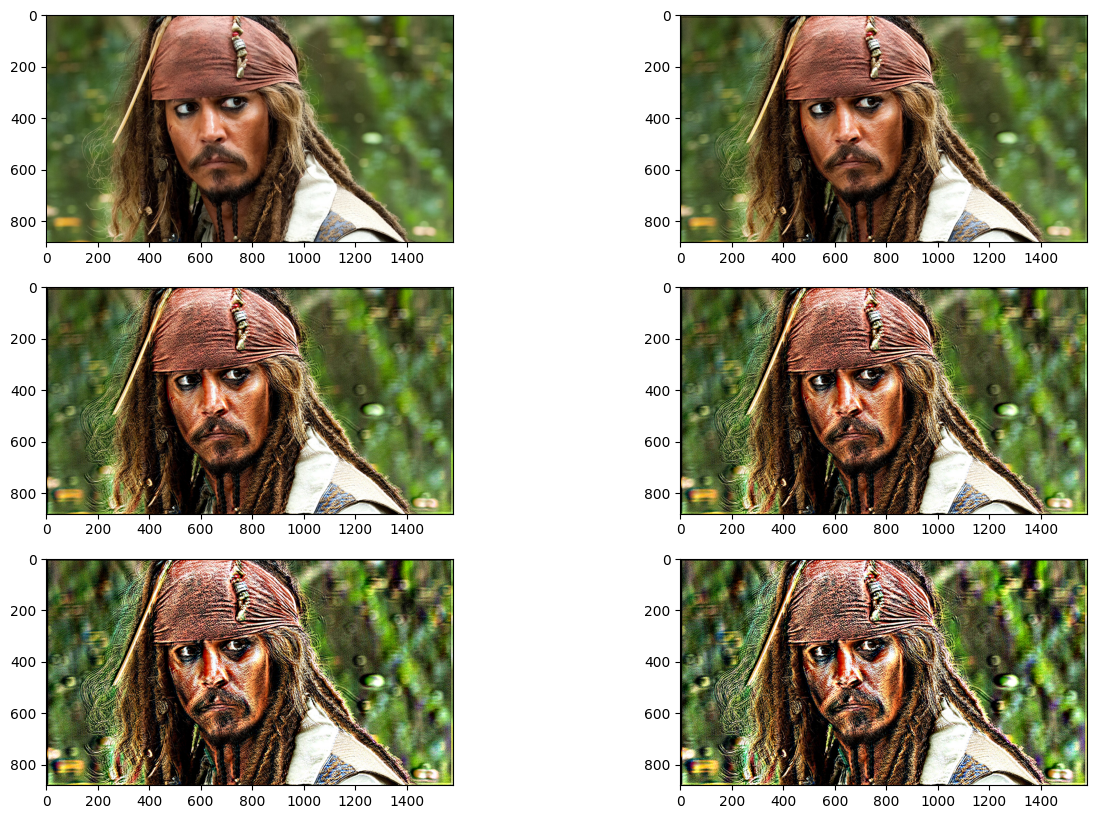

In [8]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened_1 = img.astype(np.float32) + diff * 0.3
sharpened_2 = img.astype(np.float32) + diff * 0.7
sharpened_3 = img.astype(np.float32) + diff * 1
sharpened_4 = img.astype(np.float32) + diff * 1.5
sharpened_5 = img.astype(np.float32) + diff * 2
sharpened_1 = np.clip(sharpened_1, 0, 255).astype(np.uint8)
sharpened_2 = np.clip(sharpened_2, 0, 255).astype(np.uint8)
sharpened_3 = np.clip(sharpened_3, 0, 255).astype(np.uint8)
sharpened_4 = np.clip(sharpened_4, 0, 255).astype(np.uint8)
sharpened_5 = np.clip(sharpened_5, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(3, 2)
axes[0, 0].imshow(img)
axes[0, 1].imshow(sharpened_1)
axes[1, 0].imshow(sharpened_2)
axes[1, 1].imshow(sharpened_3)
axes[2, 0].imshow(sharpened_4)
axes[2, 1].imshow(sharpened_5)
plt.show()

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?